플레이스토어의 별점을 예측하는 모델을 만들어보겠습니다.

데이터셋에 포함된 특성은 다음과 같습니다.
- App
- Category
- Rating
- Reviews
- Size
- Installs
- Type
- Price
- Content Rating
- Genres

In [1]:
# -*- encoding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T.drop('count', axis = 1)], axis = 1)
desc


,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
App,10841,9660,89.106171,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,0.313624,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,40,0.368970,1474,float64,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,55.363896,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,4.261599,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,0.202933,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,0.027673,1,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0.857854,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,0.055345,1,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,1.106909,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.info(), '\n')
print(df.shape, '\n')
print(df.isnull().sum(), '\n')
print(df.dtypes, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None 

(10841, 13) 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type

In [4]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
df.iloc[10472,1:] = df.iloc[10472,1:].shift(1)

In [6]:
df.iloc[10472,1:]

Category                       None
Rating                          1.9
Reviews                        19.0
Size                           3.0M
Installs                     1,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                          NaN
Last Updated      February 11, 2018
Current Ver                  1.0.19
Android Ver              4.0 and up
Name: 10472, dtype: object

In [21]:
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None 



In [7]:
df['Rating'] = df['Rating'].astype(float, errors = 'raise')

In [8]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated'].dtype

dtype('<M8[ns]')

In [9]:
df['year_added'] = df['Last Updated'].dt.year
df['month_added'] = df['Last Updated'].dt.month

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [11]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [12]:
def wrapping(df, feature, c1, c2):
    wrap_df = df[feature].value_counts().reset_index()
    wrap_df.columns=[c1, c2]
    return wrap_df

def visualize(visual='scatter', df1=None, df2=None, column1=None, column2=None, title=None):
    
    if visual == 'scatter':
        plt.plot(df1[column1], df1[column2], label=column1)
        plt.plot(df2[column1], df2[column2], label=column2)

        plt.title(title)
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xticks(rotation=-90)
        plt.legend()
        

        return plt.show()
    elif visual == 'bar':
        labels = df1[column1]
        values = df1[column2]

        plt.bar(labels, values)

        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(title)

#         plt.xticks(rotation=90)

        return plt.show()
    elif visual == 'pie':
        labels = df1[column1].value_counts().index
        values = df1[column1].value_counts().values

        plt.pie(values, labels=labels, autopct='%1.1f%%')

        plt.title(title)
        plt.axis('equal')

        return plt.show()

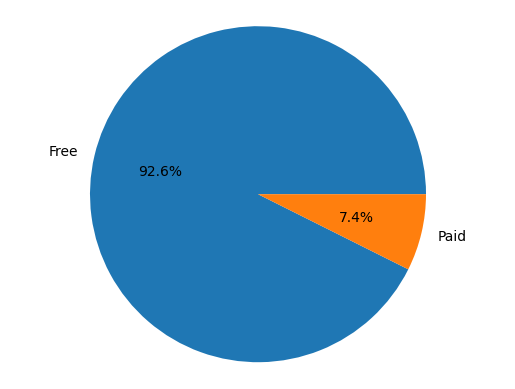

In [13]:
visualize('pie', df, None, 'Type')

In [14]:
df1 = df[df['Type']=='Free']
df2 = df[df['Type']=='Paid']

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


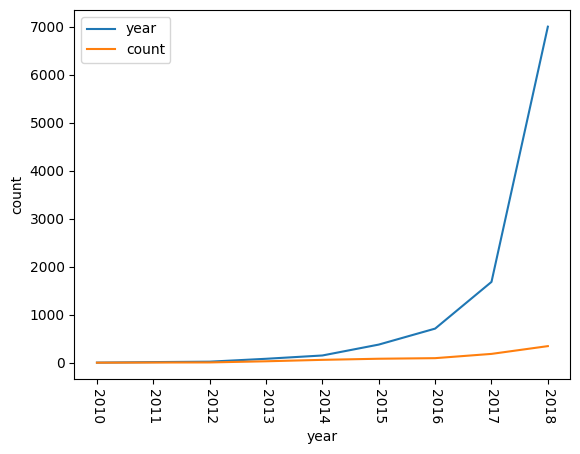

In [15]:
free = wrapping(df1, 'year_added', 'year', 'count')
paid = wrapping(df2, 'year_added', 'year', 'count')
display(free)
display(paid)

row = pd.DataFrame({'year':[2010],'count':[0]})
paid = pd.concat([paid, row]).reset_index()
del paid["index"]
display(paid)

visualize('scatter', free, paid, 'year', 'count')

,month,count
0,7,3022
1,8,1511
2,6,1179
3,5,897
4,3,595
5,4,553
6,2,489
7,1,444
8,12,363
9,10,357


,month,count
0,7,141
1,6,93
2,8,83
3,5,81
4,3,72
5,4,63
6,12,63
7,1,47
8,2,45
9,10,41


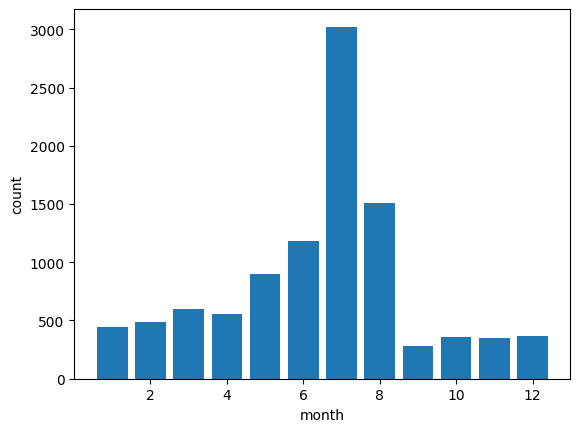

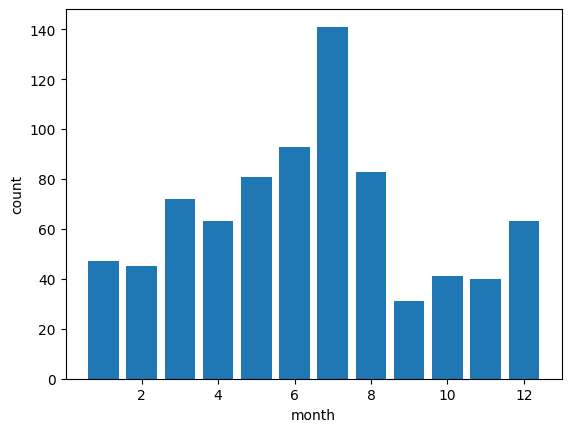

In [139]:
output1 = wrapping(df1, 'month_added', 'month', 'count')
display(output1)
output2 = wrapping(df2, 'month_added', 'month', 'count')
display(output2)
visualize('bar', output1, None, 'month', 'count')
visualize('bar', output2, None, 'month', 'count')

In [16]:
df1.groupby('month_added').agg({'month_added':'count'})

,month_added
month_added,
1,444
2,489
3,595
4,553
5,897
6,1179
7,3022
8,1511
9,283


,users,count
0,Everyone,8020
1,Teen,1156
2,Mature 17+,479
3,Everyone 10+,380
4,Adults only 18+,3
5,Unrated,2


,users,count
0,Everyone,695
1,Teen,52
2,Everyone 10+,33
3,Mature 17+,20


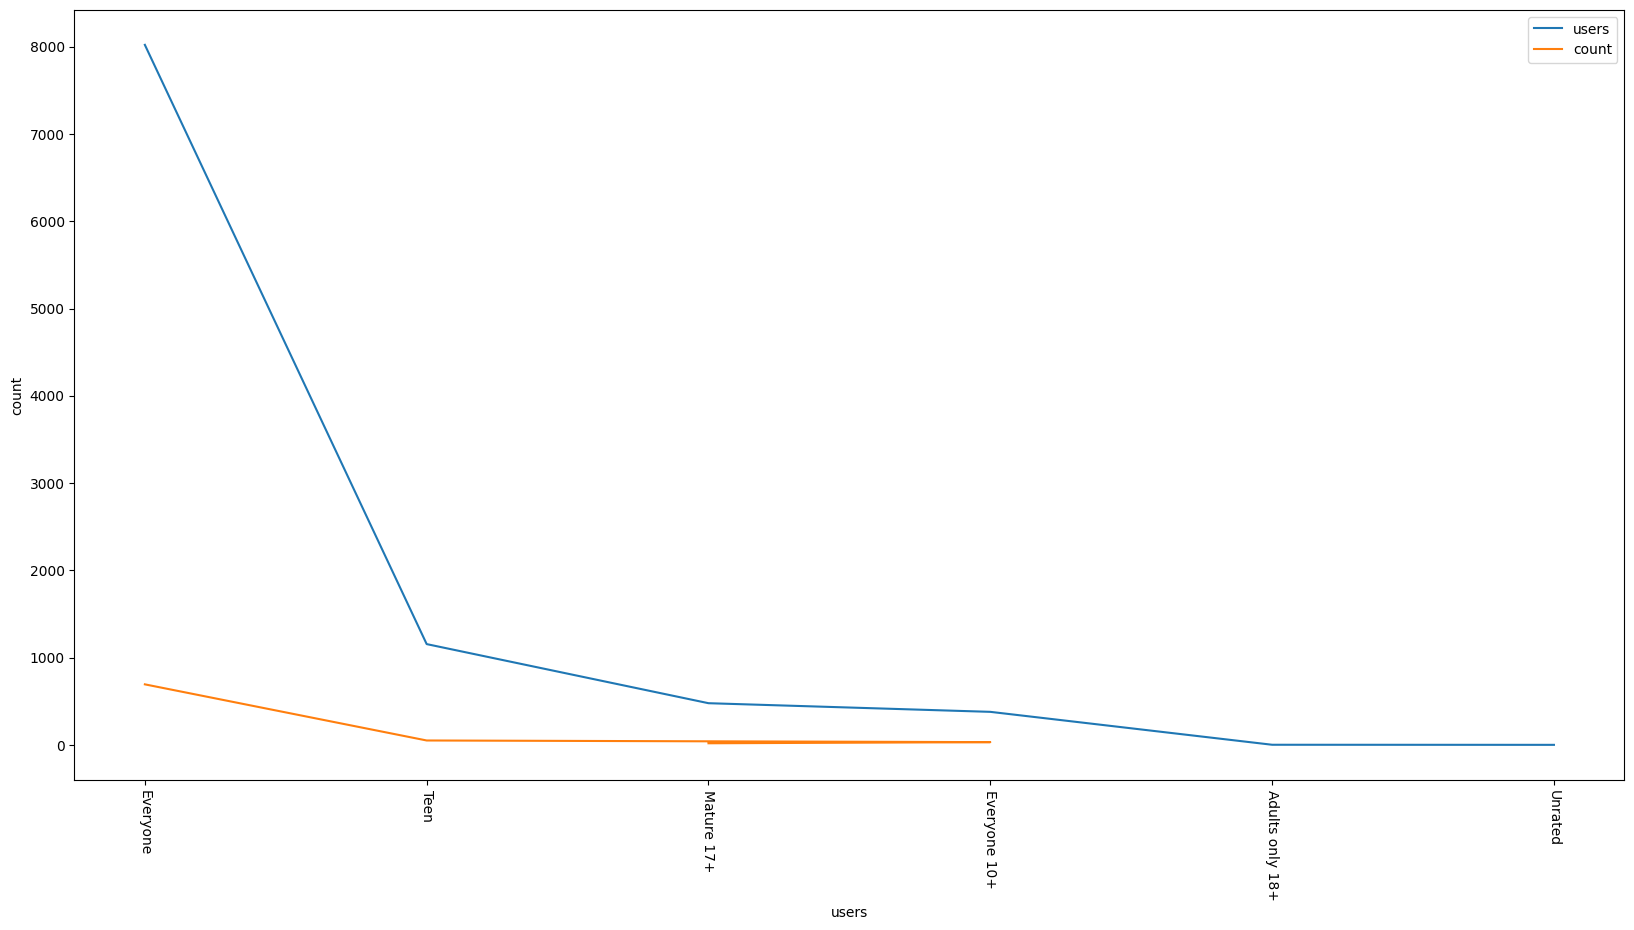

In [17]:
output3 = wrapping(df1, 'Content Rating', 'users', 'count')
display(output3)
output4 = wrapping(df2, 'Content Rating', 'users', 'count')
display(output4)
# for index, row in output3.iterrows():
#     user = row['users']
#     if len(output4[output4['users'] == user]) == 0:
#         row = pd.DataFrame({'users':user,'count':[0]})
#         output4 = pd.concat([output4, row]).reset_index()
#         del output4["index"]
# display(output4)
visualize('scatter', output3, output4, 'users', 'count')

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.6 2.2 1.7 2.  2.4 1.8 1.6
 2.1 1.4 1.5 1.2]
1320


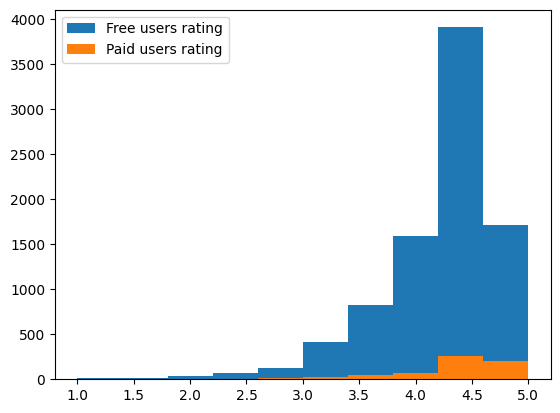

In [171]:
print(df1['Rating'].unique())
print(df1['Rating'].isna().sum())
plt.hist(df1['Rating'].dropna(), label='Free users rating')
plt.hist(df2['Rating'].dropna(), label='Paid users rating')
plt.legend()

,ratings,count
29,1.0,14
38,1.2,1
36,1.4,3
37,1.5,3
35,1.6,4
33,1.7,7
34,1.8,7
30,1.9,14
31,2.0,11
32,2.1,8


,ratings,count
25,1.0,2
29,1.7,1
28,1.8,1
30,2.0,1
24,2.3,2
22,2.4,2
31,2.5,1
27,2.6,2
23,2.7,2
21,2.8,3


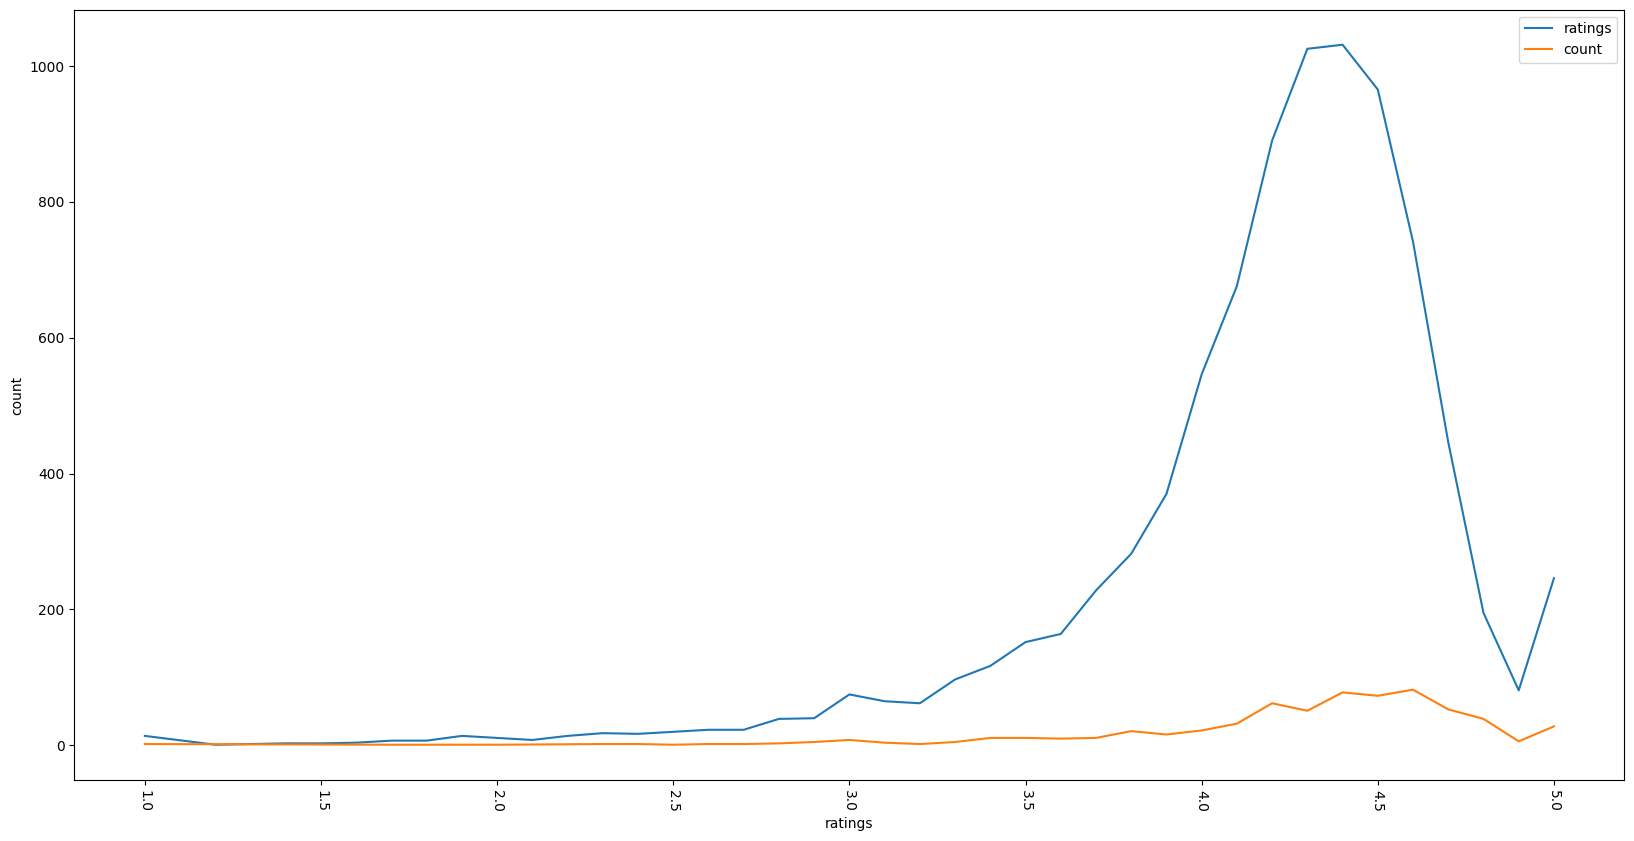

In [18]:
output5 = wrapping(df1, 'Rating', 'ratings', 'count').sort_values(by='ratings')
output6 = wrapping(df2, 'Rating', 'ratings', 'count').sort_values(by='ratings')
display(output5)
display(output6)

visualize('scatter', output5, output6, 'ratings', 'count')

,categories,count
29,ART_AND_DESIGN,62
26,AUTO_AND_VEHICLES,82
32,BEAUTY,53
18,BOOKS_AND_REFERENCE,203
3,BUSINESS,446
30,COMICS,60
6,COMMUNICATION,360
17,DATING,227
20,EDUCATION,152
21,ENTERTAINMENT,147


,categories,count
22,ART_AND_DESIGN,3
20,AUTO_AND_VEHICLES,3
6,BOOKS_AND_REFERENCE,28
13,BUSINESS,14
7,COMMUNICATION,27
16,DATING,7
18,EDUCATION,4
24,ENTERTAINMENT,2
29,EVENTS,1
0,FAMILY,191


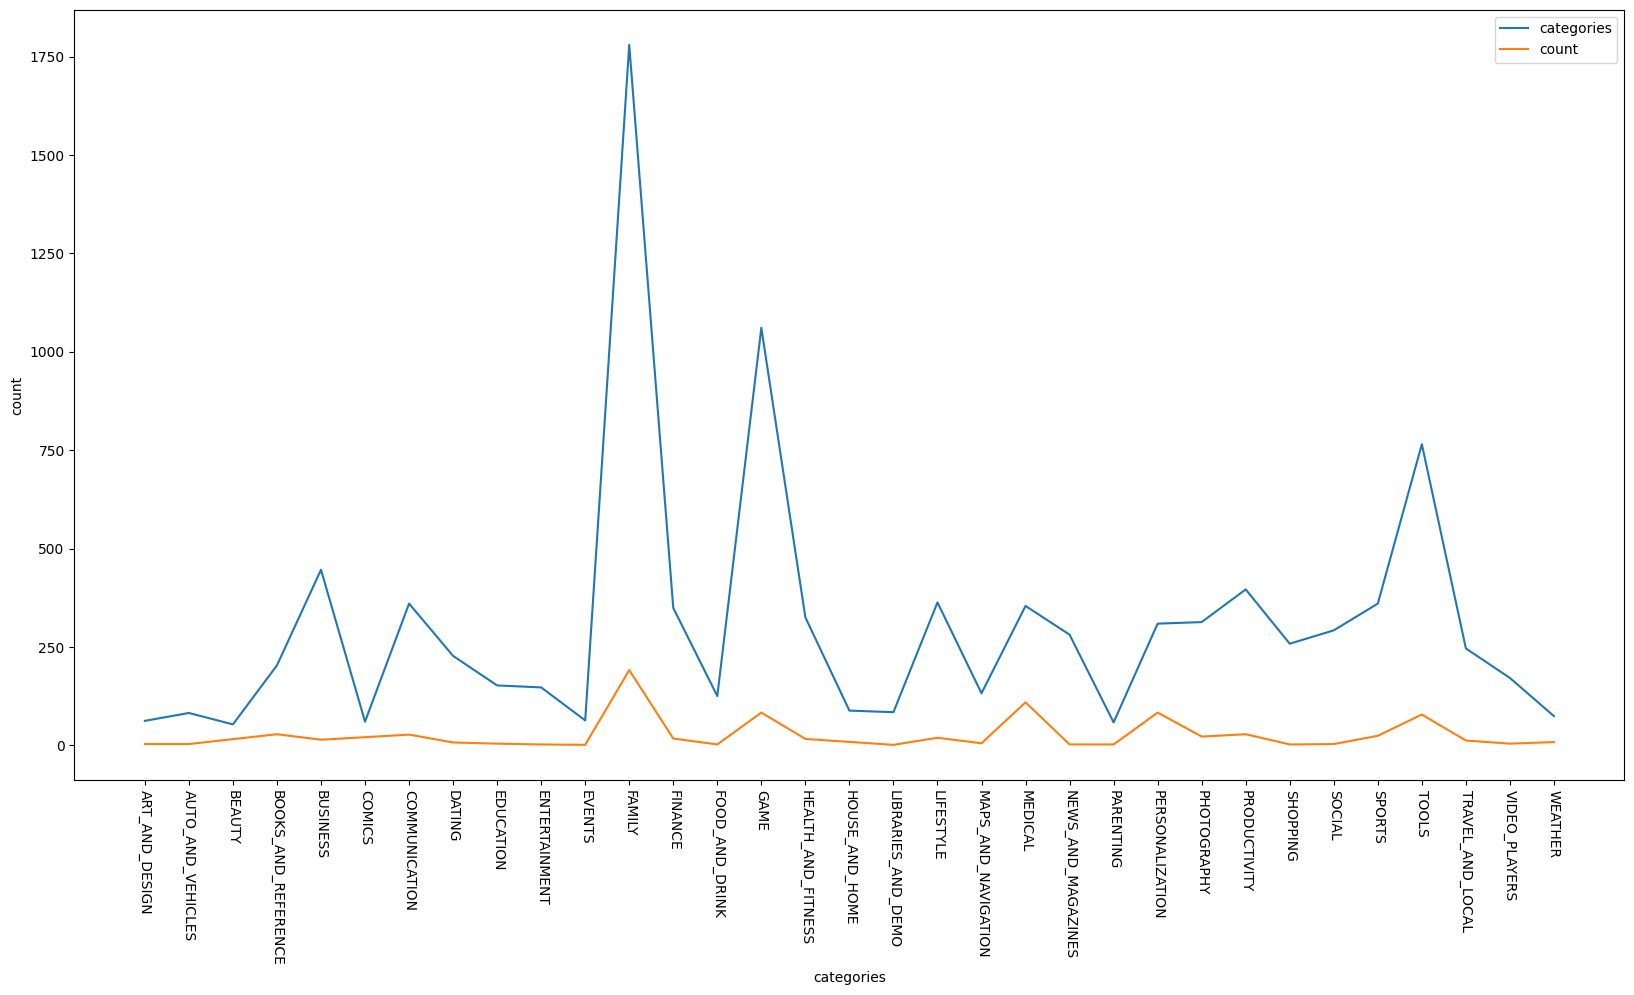

In [19]:
df1['Category'].unique()
output7 = wrapping(df1, 'Category', 'categories', 'count').sort_values(by='categories')
output8 = wrapping(df2, 'Category', 'categories', 'count').sort_values(by='categories')
display(output7)
display(output8)

visualize('scatter', output7, output8, 'categories', 'count')

,android-versions,count
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
26,2.0.1 and up,2
12,2.1 and up,107
31,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


,android-versions,count
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
18,2.0.1 and up,5
11,2.1 and up,27
5,2.2 and up,49
3,2.3 and up,72
10,2.3.3 and up,30
8,3.0 and up,34
23,3.1 and up,1


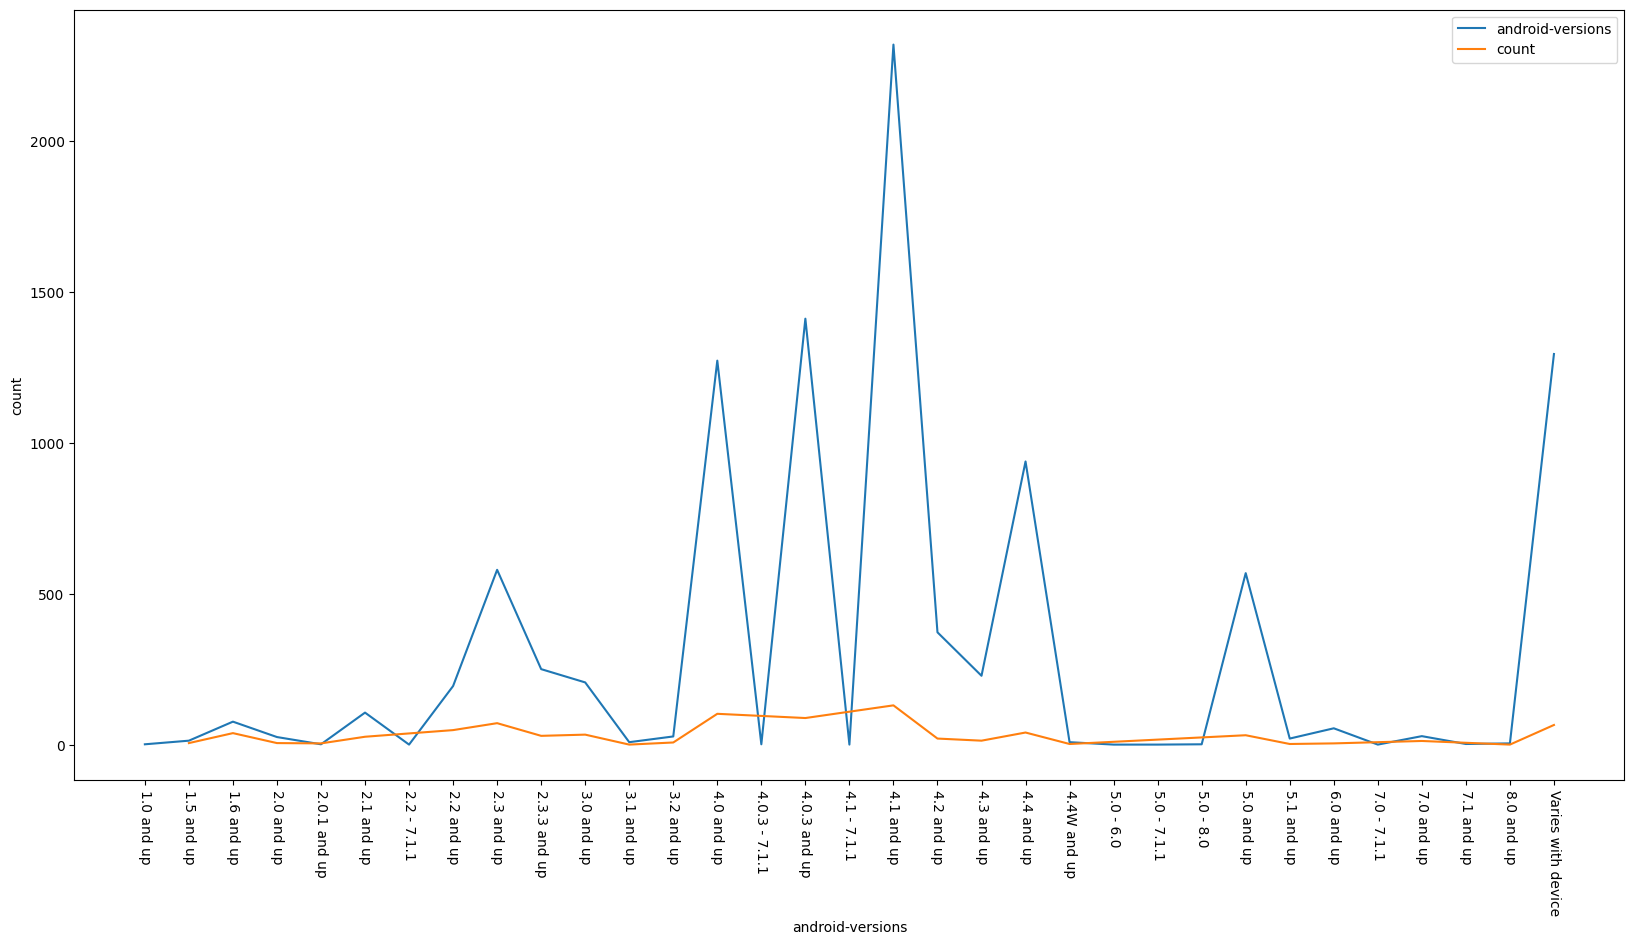

In [20]:
df1['Android Ver'].unique()
output9 = wrapping(df1, 'Android Ver', 'android-versions', 'count').sort_values(by='android-versions')
output10 = wrapping(df2, 'Android Ver', 'android-versions', 'count').sort_values(by='android-versions')
display(output9)
display(output10)

visualize('scatter', output9, output10, 'android-versions', 'count')

,installs,count
19,0+,4
18,1+,46
4,"1,000+",759
0,"1,000,000+",1555
17,"1,000,000,000+",58
11,10+,316
3,"10,000+",925
1,"10,000,000+",1249
6,100+,623
2,"100,000+",1079


,installs,count
13,0+,10
10,1+,21
0,"1,000+",149
9,"1,000,000+",24
4,10+,70
1,"10,000+",129
14,"10,000,000+",3
2,100+,96
3,"100,000+",90
12,5+,12


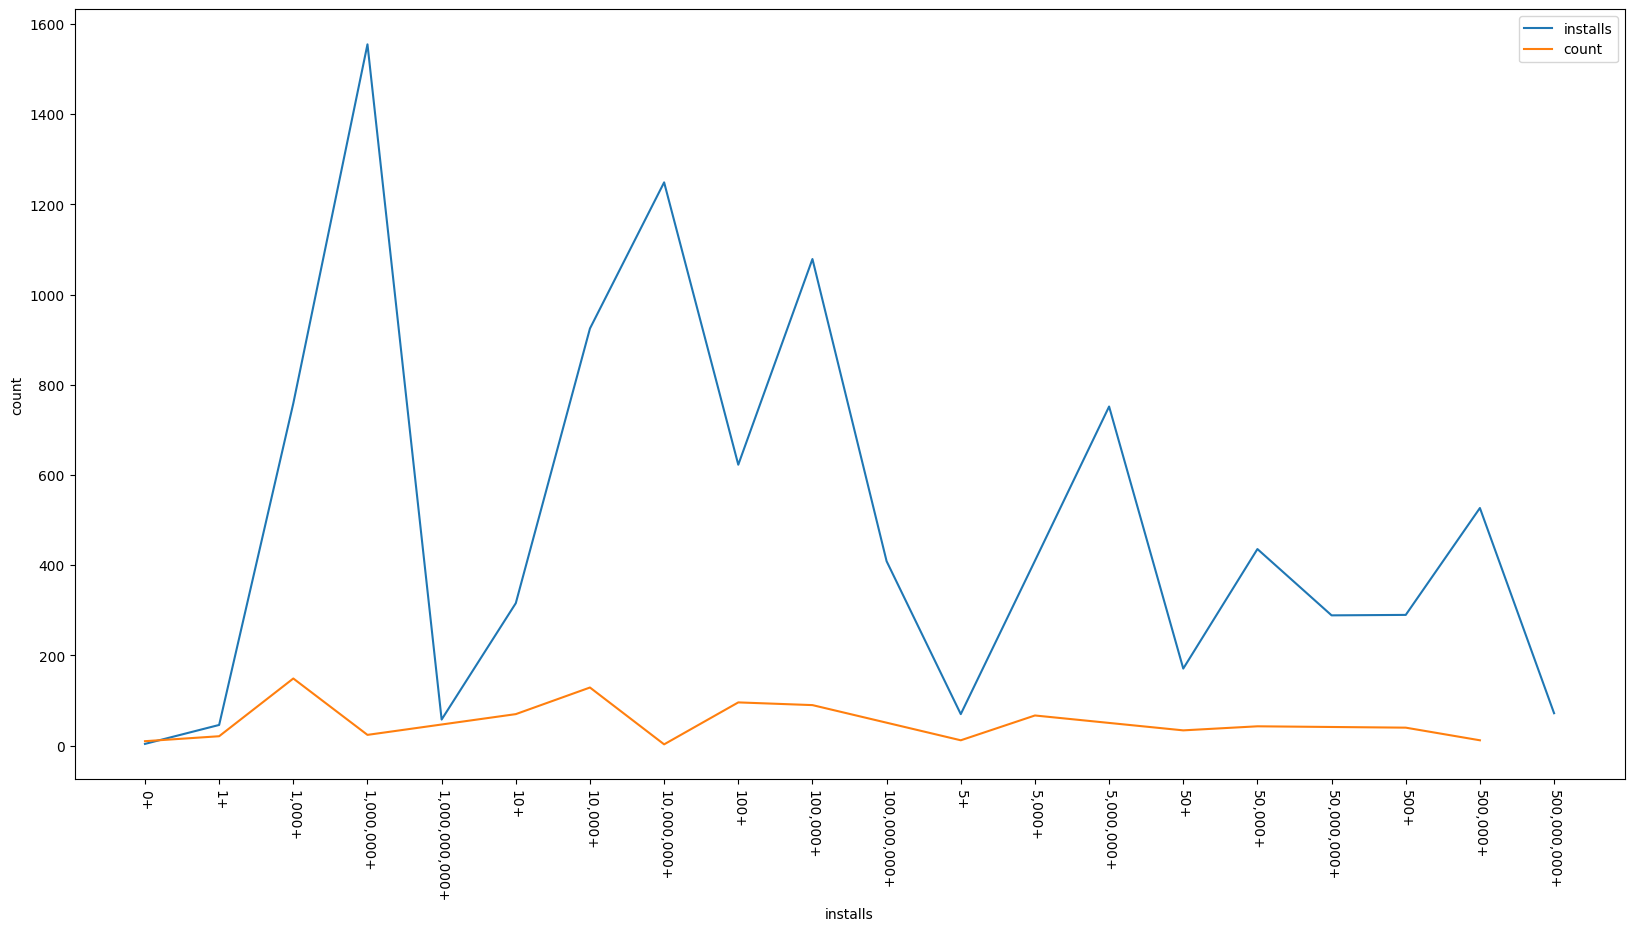

In [21]:
df1['Installs'].unique()
output11 = wrapping(df1, 'Installs', 'installs', 'count').sort_values(by='installs')
output12 = wrapping(df2, 'Installs', 'installs', 'count').sort_values(by='installs')
display(output11)
display(output12)

visualize('scatter', output11, output12, 'installs', 'count')

In [22]:

# display(df[df['Price'].str[0] == '$'])
def remove_pattern(x, pattern, t=None):
    if t == 'int':
        return int(x.replace(pattern, ''))
    elif t == 'float':
        return float(x.replace(pattern, ''))
    return x.replace(pattern, '')

def convert_to_mb(x):
    if x[-1] == 'M':
        return float(x[:-1])
    elif x[-1] == 'k':
        return np.round(float(x[:-1])/1024, 2)
#     elif x.isdigit():
#         return x
#     else:
#         return 0

In [23]:
df_cp = df.copy()
df_cp['Price'] = df_cp['Price'].apply(remove_pattern, args=('$', 'float'))
# display(df_cp[df_cp['Price'].str[0] == '$'])
df_cp['Installs'] = df_cp['Installs'].apply(remove_pattern, args=',').apply(remove_pattern, args=('+', 'int'))
# df_cp['Size'] = df_cp['Size'].apply(convert_to_mb)
# df_cp = df_cp[df_cp['Size']!='Varies with device']
df_cp['Size'].replace('Varies with device', '13M', inplace=True) # 윗줄 실행해서 지우고 실행했을때 median(평균)값이 13.0이 나와서
df_cp['Size'] = df_cp['Size'].apply(convert_to_mb)
df_cp = df_cp.dropna()

In [303]:
df_cp['Size'].median()

13.0

In [25]:
df_cp.corr()

C:\Users\csjty\AppData\Local\Temp\ipykernel_24856\1935389897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cp.corr()


,Rating,Size,Installs,Price,year_added,month_added
Rating,1.000000,0.065855,0.051337,-0.021919,0.137871,0.017234
Size,0.065855,1.000000,0.040449,-0.021842,0.180163,0.031644
Installs,0.051337,0.040449,1.000000,-0.011895,0.092689,0.060282
Price,-0.021919,-0.021842,-0.011895,1.000000,-0.003406,-0.001881
year_added,0.137871,0.180163,0.092689,-0.003406,1.000000,-0.171858
month_added,0.017234,0.031644,0.060282,-0.001881,-0.171858,1.000000


In [34]:
df_cp.to_csv('E:/workspace/ml-2023/applied-machine-learning-real-world-projects-using-python/predict-ratings-of-applications-on-play-store/googleplaystore_filtered.csv', index = False)

In [36]:
input = pd.read_csv('googleplaystore_filtered.csv')

# input.drop(['Unnamed: 0'], axis = 1, inplace = True)

input.corr()

C:\Users\csjty\AppData\Local\Temp\ipykernel_24856\1963578259.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  input.corr()


,Rating,Reviews,Size,Installs,Price,year_added,month_added
Rating,1.000000,0.068133,0.065855,0.051337,-0.021919,0.137871,0.017234
Reviews,0.068133,1.000000,0.100870,0.641605,-0.009824,0.078321,0.048959
Size,0.065855,0.100870,1.000000,0.040449,-0.021842,0.180163,0.031644
Installs,0.051337,0.641605,0.040449,1.000000,-0.011895,0.092689,0.060282
Price,-0.021919,-0.009824,-0.021842,-0.011895,1.000000,-0.003406,-0.001881
year_added,0.137871,0.078321,0.180163,0.092689,-0.003406,1.000000,-0.171858
month_added,0.017234,0.048959,0.031644,0.060282,-0.001881,-0.171858,1.000000
